 20%|██        | 2/10 [00:00<00:00,  9.51it/s]




**************************************************
IGD+ is 0.6636620940412489
# generation is 800.0
Time elapsed for solving problem:  0.06932187080383301  seconds



**************************************************
IGD+ is 0.2844781674051189
# generation is 1822.2222222222222
Time elapsed for solving problem:  0.13996410369873047  seconds


 30%|███       | 3/10 [00:00<00:01,  5.93it/s]




**************************************************
IGD+ is 0.18873529156520685
# generation is 2844.4444444444443
Time elapsed for solving problem:  0.25661325454711914  seconds


 40%|████      | 4/10 [00:00<00:01,  4.59it/s]




**************************************************
IGD+ is 0.09933817255064441
# generation is 3866.6666666666665
Time elapsed for solving problem:  0.3000149726867676  seconds


 50%|█████     | 5/10 [00:01<00:01,  3.52it/s]




**************************************************
IGD+ is 0.04875862712526752
# generation is 4888.888888888889
Time elapsed for solving problem:  0.40665292739868164  seconds


 60%|██████    | 6/10 [00:01<00:01,  2.87it/s]




**************************************************
IGD+ is 0.024610589990502446
# generation is 5911.111111111111
Time elapsed for solving problem:  0.47645115852355957  seconds


 70%|███████   | 7/10 [00:02<00:01,  2.41it/s]




**************************************************
IGD+ is 0.01793021537456905
# generation is 6933.333333333333
Time elapsed for solving problem:  0.5549001693725586  seconds


 80%|████████  | 8/10 [00:02<00:00,  2.03it/s]




**************************************************
IGD+ is 0.014023015752897154
# generation is 7955.555555555555
Time elapsed for solving problem:  0.661168098449707  seconds


 90%|█████████ | 9/10 [00:03<00:00,  1.74it/s]




**************************************************
IGD+ is 0.011948747241856619
# generation is 8977.777777777777
Time elapsed for solving problem:  0.760828971862793  seconds


100%|██████████| 10/10 [00:04<00:00,  2.21it/s]




**************************************************
IGD+ is 0.010782624410125077
# generation is 10000.0
Time elapsed for solving problem:  0.8916599750518799  seconds


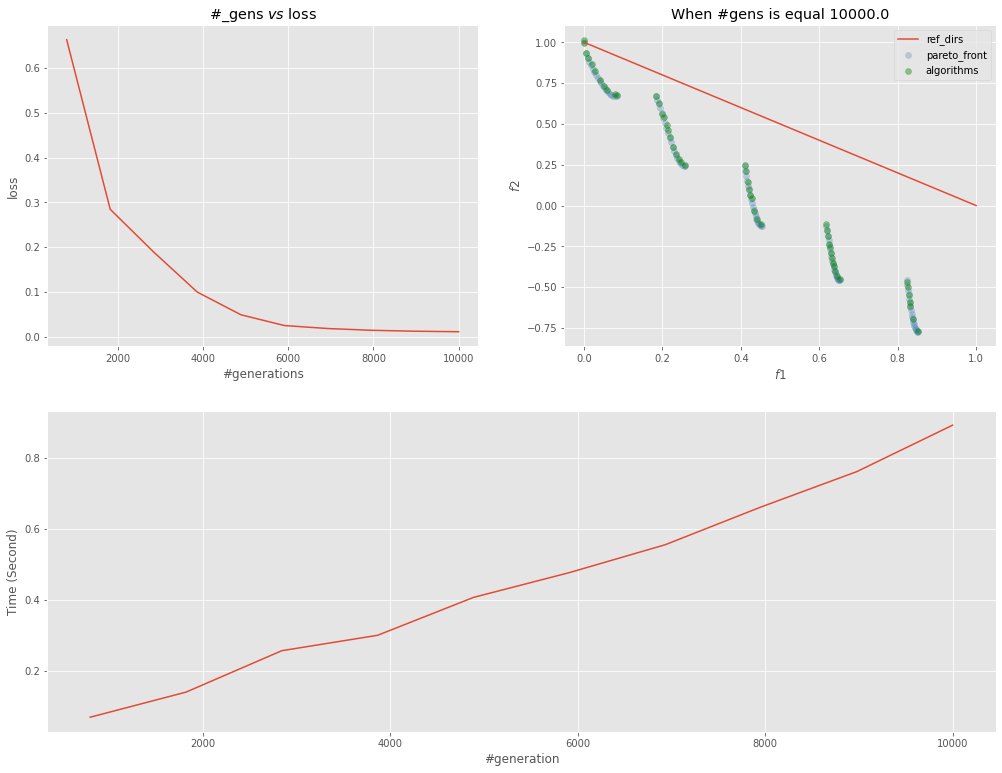

In [8]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation, get_termination,get_reference_directions,get_problem,get_performance_indicator

from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.util.termination.default import MultiObjectiveDefaultTermination
from matplotlib import pyplot as plt 
import numpy as np
import time
import sys
from tqdm import tqdm
import os 



#get problem
p = get_problem('ZDT3') #https://pymoo.org/problems/index.html


#pareto front
pf = p.pareto_front()

loss = []
Time = []

#a set of generations
n= np.linspace(800,10000,10)

for i in tqdm(n):
    # create the reference directions to be used for the optimization
    M = 2  #ZDT1 2 var_
    ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=50) # C_50^50+2-1 #https://pymoo.org/misc/reference_directions.html
    N = ref_dirs.shape[0] #pop_size

    #NSGA algorithms
    algorithm = NSGA2(
        n_offspring = 20,
        pop_size= N,
        ref_dirs = ref_dirs,
    #  crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    #  mutation=get_mutation("real_pm", eta=20),
        eliminate_duplicates=True    
    )


    termination = get_termination("n_eval", i) #! change #generation each time
    
    start = time.time()
    res = minimize(p,
                algorithm,
                termination = termination,
                seed=1,
                save_history=True,
                verbose=False)
                
    # The result found by an algorithm
    A = res.F
    #
    gd = get_performance_indicator("igd",pf )

    #performace indicator 
    print('\n\n')
    print('*'*50)
    print('IGD+ is',gd.calc(res.F))
    print('# generation is',i)

    loss.append(gd.calc(res.F))

    end_time = time.time() - start
    Time.append(end_time)
    print('Time elapsed for solving problem: ', end_time,' seconds')


label = str(n[-1])
plt.style.use('ggplot')

plt.figure(figsize=(17,13))
plt.subplot(2,2,1)

plt.plot(n, loss)
plt.ylabel('loss')
plt.xlabel('#generations')
plt.title('#_gens $vs$ loss')

plt.subplot(2,2,2)
plt.scatter(pf[:,0],pf[:,1],label='pareto_front',alpha =0.3,c='steelblue')
plt.scatter(A[:,0],A[:,1],label='algorithms', alpha= 0.4, c='green')
plt.plot(ref_dirs[:,0],ref_dirs[:,1],label='ref_dirs')
plt.xlabel('$f1$')
plt.ylabel('$f2$')
plt.title('When #gens is equal ' + str(n[-1]))
plt.legend()

plt.subplot(2,1,2)
plt.plot(n, Time)
plt.xlabel('#generation')
plt.ylabel('Time (Second)')


plt.show()


#print('Solution',np.array(res.X), 'Obj_value',np.array(res.F), 'CV',np.array(res.CV))
#print("GD", loss)


# plot the result
#Scatter(legend=True,title = '#generation '+str(n[-1])).add(pf, label="Pareto-front").add(A, label="Result").show()



## Decomposition

# name: ZDT3
# n_var: 30
# n_obj: 2
# n_constr: 0
 (51, 2)
Best regarding decomposition: Point 1 - [ 0.85304603 -0.76820254]


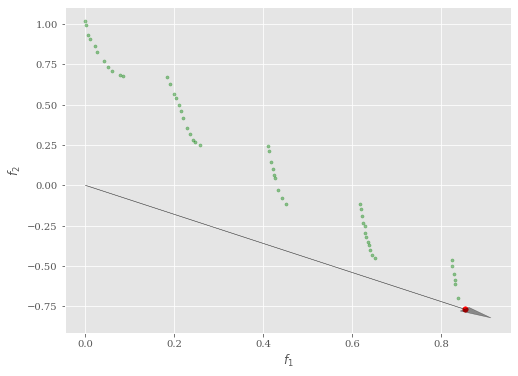

In [12]:
from pymoo.factory import get_decomposition
from pymoo.util.misc import all_combinations
p = get_problem('ZDT3')

pf = res.F
print(p,pf.shape)

weights = np.array([0.5, 0.5])

scalar = get_decomposition("weighted-sum").do(res.F,weights)

I  = scalar.argmin()

print("Best regarding decomposition: Point %s - %s" % (I, res.F[I]))
from pymoo.factory import get_visualization

plot = get_visualization("scatter")
plot.add(res.F, color="green", alpha=0.4, s=10)
plot.add(pf[I], color="red", s=30)
plot.do()
plot.apply(lambda ax: ax.arrow(0, 0, pf[I][0], pf[I][1], color='black',
                            head_width=0.03, head_length=0.08, alpha=0.4))
plot.show()

In [13]:
n_evals = []    # corresponding number of function evaluations\
F = []          # the objective space values in each generation
cv = []         # constraint violation in each generation


# iterate over the deepcopies of algorithms
for algorithm in res.history:

    # store the number of function evaluations
    n_evals.append(algorithm.evaluator.n_eval)

    # retrieve the optimum from the algorithm
    opt = algorithm.opt

    # store the least contraint violation in this generation
    cv.append(opt.get("CV").min())

    # filter out only the feasible and append
    feas = np.where(opt.get("feasible"))[0]
    _F = opt.get("F")[feas]
    F.append(_F)

## Constraint Violation (CV)

First feasible solution found after 51 evaluations


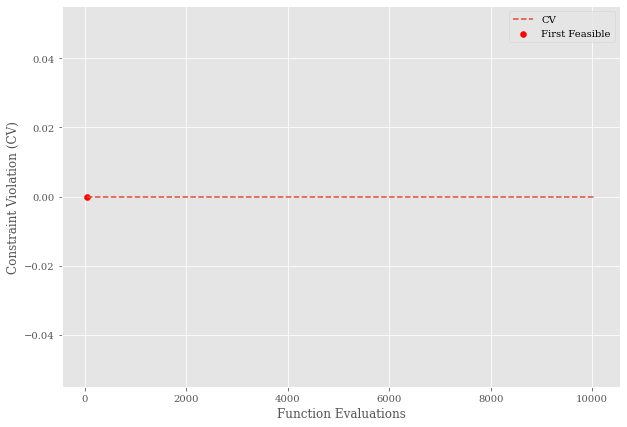

In [14]:
import matplotlib.pyplot as plt

k = min([i for i in range(len(cv)) if cv[i] <= 0])
first_feas_evals = n_evals[k]
print(f"First feasible solution found after {first_feas_evals} evaluations")

plt.figure(figsize=(10,7))
plt.plot(n_evals, cv, '--', label="CV")
plt.scatter(first_feas_evals, cv[k], color="red", label="First Feasible")
plt.xlabel("Function Evaluations")
plt.ylabel("Constraint Violation (CV)")
plt.legend()
plt.show()

## Hypvervolume (HV)

ref_point which shall be larger than the maximum value of the Pareto front.

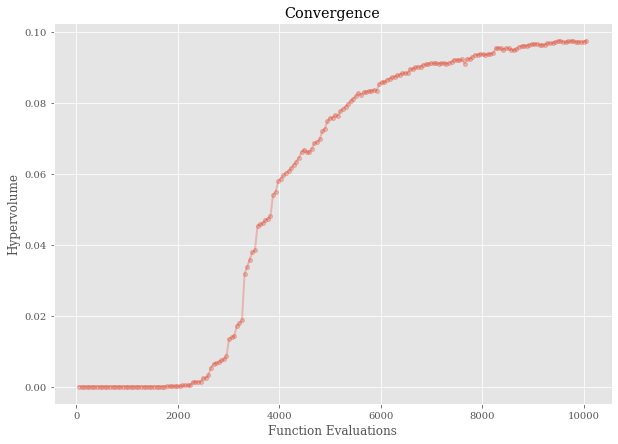

In [15]:
from pymoo.performance_indicator.hv import Hypervolume

ref_point = res.F[scalar.argmax()] + [0.1+0.1]
# create the performance indicator object with reference point
metric = Hypervolume(ref_point=ref_point, normalize=False)

# calculate for each generation the HV metric
hv = [metric.calc(f) for f in F]

# visualze the convergence curve
plt.figure(figsize=(10,7))
plt.plot(n_evals, hv, '-o', markersize=4, linewidth=2, alpha =0.3)
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.show()


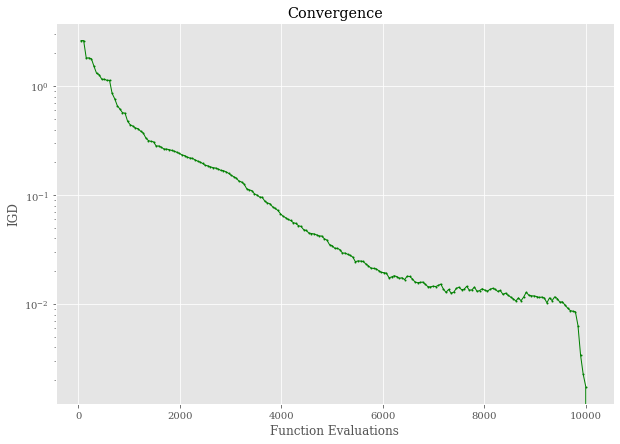

In [16]:
import matplotlib.pyplot as plt
from pymoo.performance_indicator.igd import IGD

if pf is not None:

    # for this test problem no normalization for post prcessing is needed since similar scales
    normalize = False

    metric = IGD(pf=pf, normalize=normalize)

    # calculate for each generation the HV metric
    igd = [metric.calc(f) for f in F]

    # visualze the convergence curve
    plt.figure(figsize=(10,7))
    plt.plot(n_evals, igd, '-o', markersize=1, linewidth=1, color="green")
    plt.yscale("log")          # enable log scale if desired
    plt.title("Convergence")
    plt.xlabel("Function Evaluations")
    plt.ylabel("IGD")
    plt.show()

# Plotting until the final population shows the the algorithm seems to have more a less converged and only a small improvement has been made.



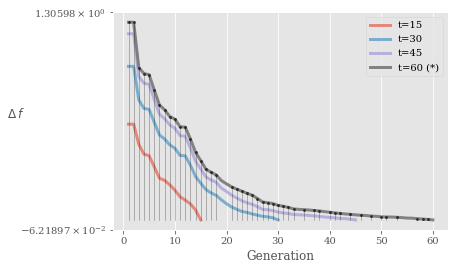

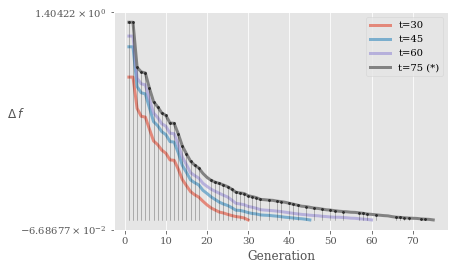

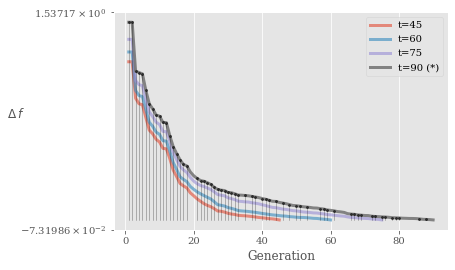

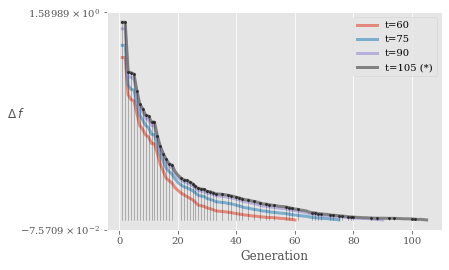

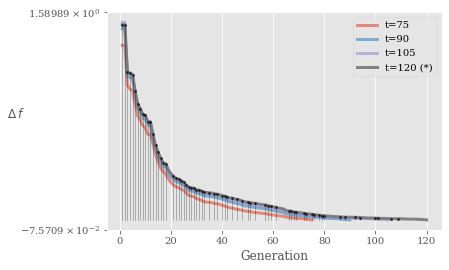

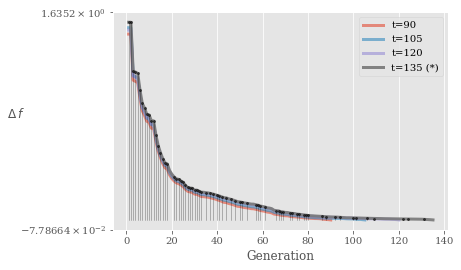

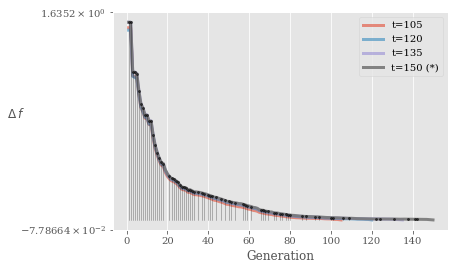

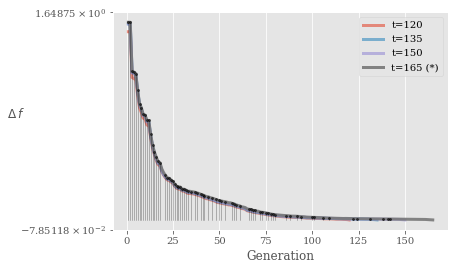

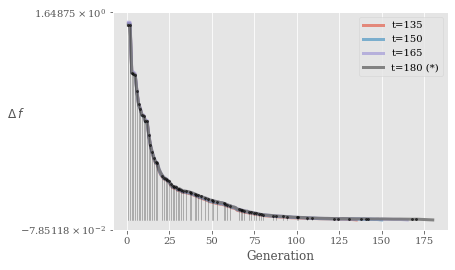

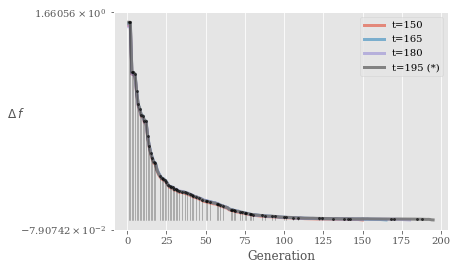

In [74]:
from pymoo.util.running_metric import RunningMetric

running = RunningMetric(delta_gen=8,
                        n_plots=4,
                        only_if_n_plots=True,
                        key_press=False,
                        do_show=True)

for algorithm in res.history:
    running.notify(algorithm)

# Random Pick

In [66]:
from pymoo.model.problem import Problem
# this function for random generating X
class binh_and_korn_Problem(Problem):

#clarify the problem
    def __init__(self):
        super().__init__(n_var=2,
                        n_obj=2,
                        n_constr=2,
                        xl=np.array([0,0]), 
                        xu=np.array([5,3]))
                        #elementwise_evaluation=True)

#var_1 = X[:,0] ; var_2 = X[:,1], var_3 = X[:2]
#objetive and constraint formula
#Note: for constraint formula, convert them <= 0
###    for objective formula, convert them into minimize
    def _evaluate(self, X, out, *args, **kwargs):
        f1 = 4*(X[:,0])**2 +4*(X[:,1])**2
        f2 = (X[:,0]-5)**2 + (X[:,1]-5)**2


    #constraints need to be formulated as g(xi)<=0
        g1 =  (X[:,0]-5)**2 + (X[:,1])**2 - 25 
        g2 =  -((X[:,0]-8)**2  + (X[:,1]-3)**2 - 7.7)

        out["F"] = np.column_stack([f1, f2]) 
        out["G"] = np.column_stack([g1, g2])


def random_pick_X(n_var = None, bound = None, datasize=None):
    a = bound[0]
    b = bound[1]
    X = (b-a)*np.random.random((datasize, n_var)) +a
    return X



In [70]:
#get problem
p = binh_and_korn_Problem()
print(p)

#random pick 
X = random_pick_X(n_var = 2, bound = (-5,8), datasize=400)

# name: binh_and_korn_Problem
# n_var: 2
# n_obj: 2
# n_constr: 2



In [71]:
def split_X(X,problem_F,problem_CV, lb, lp):
    
    #filter infeasible and feasible index
    infeasible_index = np.where(problem_CV > 0)[0]
    feasible_index = [i for i in range(X.shape[0]) if i not in infeasible_index ]
    #get feasible and infeasible input
    feasible_X = X[feasible_index]         

    infeasible_X = X[infeasible_index]
    feasible_F = problem_F[feasible_index]
    infeasible_F = problem_F[infeasible_index]

    print('------problem evaluation-----\n')
    print('Give search domain {} ~ {}  with {} data points'.format(lb, lp, X.shape[0]))
    print('{} is feasible and {} is infeasiebl'.format(len(feasible_index), len(infeasible_index)))

    if len(feasible_index) < len(infeasible_index):
        print('\n-------!!!!!!!!!!----------Plz consider redefine search domain')
    
    elif len(infeasible_index) < 20:
        print('Congraducation!! Find a resonable search domain')
    
    else :
        pass

    return feasible_X,infeasible_X, feasible_F,infeasible_F




result_p = p.evaluate(X,return_values_of = ['F','CV'])

split_X(X,result_p[0],result_p[1],1,4)


------problem evaluation-----

Give search domain 1 ~ 4  with 400 data points
126 is feasible and 274 is infeasiebl

-------!!!!!!!!!!----------Plz consider redefine search domain


(array([[ 6.18139351, -1.57345012],
        [ 4.5810817 ,  2.41043433],
        [ 2.51368511,  0.44321607],
        [ 4.84987073,  3.84127618],
        [ 7.40207959, -0.66287596],
        [ 5.82187132, -1.78956672],
        [ 0.85074895, -1.68137021],
        [ 2.16562242, -1.77565282],
        [ 4.84463076,  3.73839818],
        [ 3.34102889,  1.80253997],
        [ 3.6218666 ,  1.74409086],
        [ 1.61350233,  3.52950567],
        [ 4.35483931, -2.04342516],
        [ 4.33922264, -3.33093804],
        [ 5.10932499, -0.4923413 ],
        [ 6.50681718, -2.6018055 ],
        [ 3.8130182 ,  2.85059044],
        [ 4.51761979,  1.55418622],
        [ 3.32179597, -0.13457297],
        [ 3.66757715,  0.43540362],
        [ 4.79028179,  2.44234952],
        [ 5.76311283, -4.05426952],
        [ 5.36229293, -4.32095543],
        [ 3.05960312,  4.53122335],
        [ 4.92078541, -0.7287697 ],
        [ 2.58925248, -2.63138063],
        [ 2.65141582, -4.26433226],
        [ 5.13844254, -4.740

(array([[  0.12887872,          inf],
        [ -2.36621463,  -0.4183281 ],
        [  2.81343364,          inf],
        ...,
        [ -6.55795759,  -1.68861652],
        [ -3.97140842,  -7.22575923],
        [ -4.4772387 , -11.72467736]]),
 array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))